The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path += ['../../../easyXRD']


import easyxrd
from easyxrd.core import exrd

import xarray as xr
import numpy as np
import pybaselines
from copy import deepcopy



Checking required packages:

---scipy package with version 1.14.0 is available and imported 
---xarray package with version 2024.7.0 is available and imported 
---pymatgen package with version 2024.7.18 is available and imported 
---ipympl package with version 0.9.4 is available and imported 
---pyFAI package with version 2024.5.0 is available and imported 
---numpy package with version 1.26.4 is available and imported 
---pandas package with version 2.2.2 is available and imported 
---fabio package with version 2024.4.0 is available and imported 
---mp_api package with version 0.41.2 is available and imported 


Imported easyxrd with following configuration:



In [3]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

In [4]:
%%time


# import pyFAI,fabio
# ai_file = 'tiff_files/_calibration.poni'
# mask_file = 'tiff_files/_mask.edf'
# ai = pyFAI.load(ai_file)
# mask = fabio.open(mask_file).data

sample_Kapton = exrd()
# sample_Kapton.load_xrd_data(from_tiff_file='tiff_files/Kapton.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_Kapton.export_ds(save_dir='nc_files',save_name='Kapton.nc')
sample_Kapton.load_xrd_data(from_nc_file='nc_files/Kapton.nc',plot=False)

sample_Air = exrd()
# sample_Air.load_xrd_data(from_tiff_file='tiff_files/Air_scattering.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_Air.export_ds(save_dir='nc_files',save_name='Air.nc')
sample_Air.load_xrd_data(from_nc_file='nc_files/Air.nc',plot=False)

sample_LaB6 = exrd()
# sample_LaB6.load_xrd_data(from_tiff_file='tiff_files/NIST-LaB6.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_LaB6.export_ds(save_dir='nc_files',save_name='NIST-LaB6.nc')
sample_LaB6.load_xrd_data(from_nc_file='nc_files/NIST-LaB6.nc',plot=False)

sample_CeO2 = exrd()
# sample_CeO2.load_xrd_data(from_tiff_file='tiff_files/NIST-CeO2.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_CeO2.export_ds(save_dir='nc_files',save_name='NIST-CeO2.nc')
sample_CeO2.load_xrd_data(from_nc_file='nc_files/NIST-CeO2.nc',plot=False)

sample_mix = exrd()
# sample_mix.load_xrd_data(from_tiff_file='tiff_files/NIST-LaB6-CeO2-mix.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_mix.export_ds(save_dir='nc_files',save_name='NIST-LaB6-CeO2-mix.nc')
sample_mix.load_xrd_data(from_nc_file='nc_files/NIST-LaB6-CeO2-mix.nc',plot=False)

phases_LaB6 = [
        {"mp_id":'none', "cif":'_cifs/LaB6_a=4.1568_NIST_value.cif', "label":"LaB6", "scale":1.0025, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_CeO2 = [
        {"mp_id":'none', "cif":'_cifs/CeO2_a=5.4113_NIST_value.cif', "label":"CeO2", "scale":1.0025, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_mix = [
        {"mp_id":'none', "cif":'_cifs/LaB6_a=4.1568_NIST_value.cif', "label":"LaB6", "scale":1.0025, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/CeO2_a=5.4113_NIST_value.cif', "label":"CeO2", "scale":1.0025, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

CPU times: user 99.1 ms, sys: 11.2 ms, total: 110 ms
Wall time: 112 ms


/home/mt/software/miniforge3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mt/software/miniforge3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



Rwp from 1st refinement is = 52.096 
 
Cell parameters of all phases are refined. Rwp is now 7.791 (was 52.096)
Strain broadening of all phases are refined. Rwp is now 6.206 (was 7.791)
Size broadening of all phases are refined. Rwp is now 6.179 (was 6.206)
Background is refined. Rwp is now 6.074 (was 6.179)
After setting LeBail refinement to False, Rwp is now 6.646 (was 6.074)
Phase fractions of all phases are refined. Rwp is now 6.646 (was 6.646)
Preferred orientation for LaB6 phase is refined. Rwp is now 6.606 (was 6.646)
Background is refined. Rwp is now 6.544 (was 6.606)


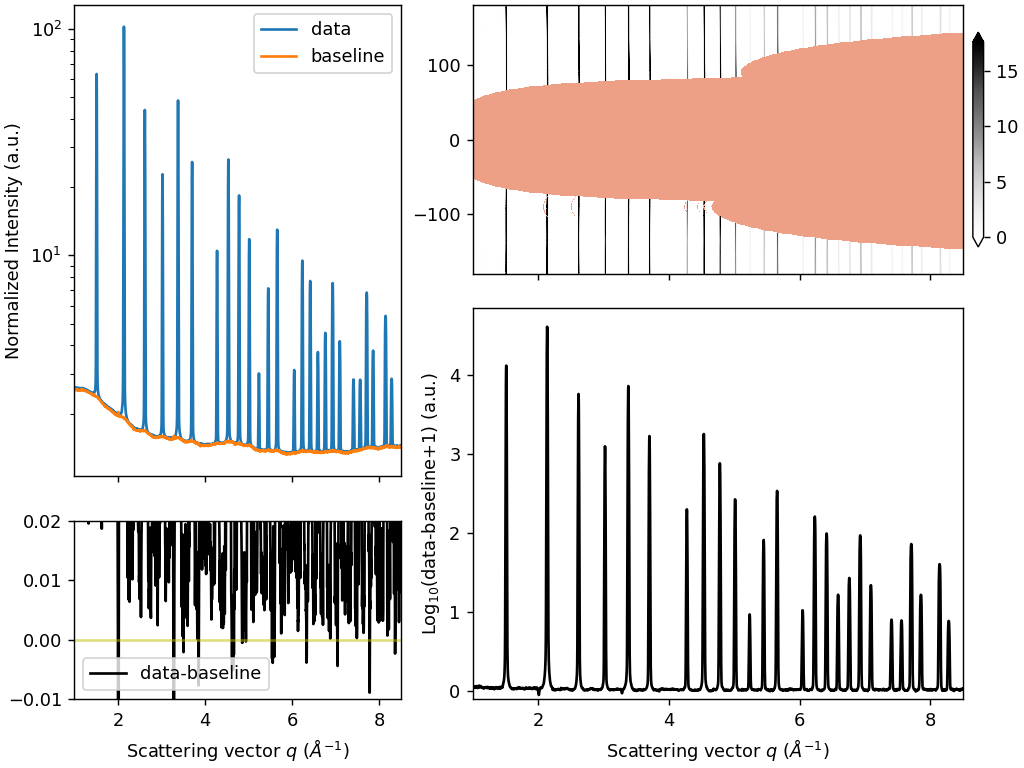

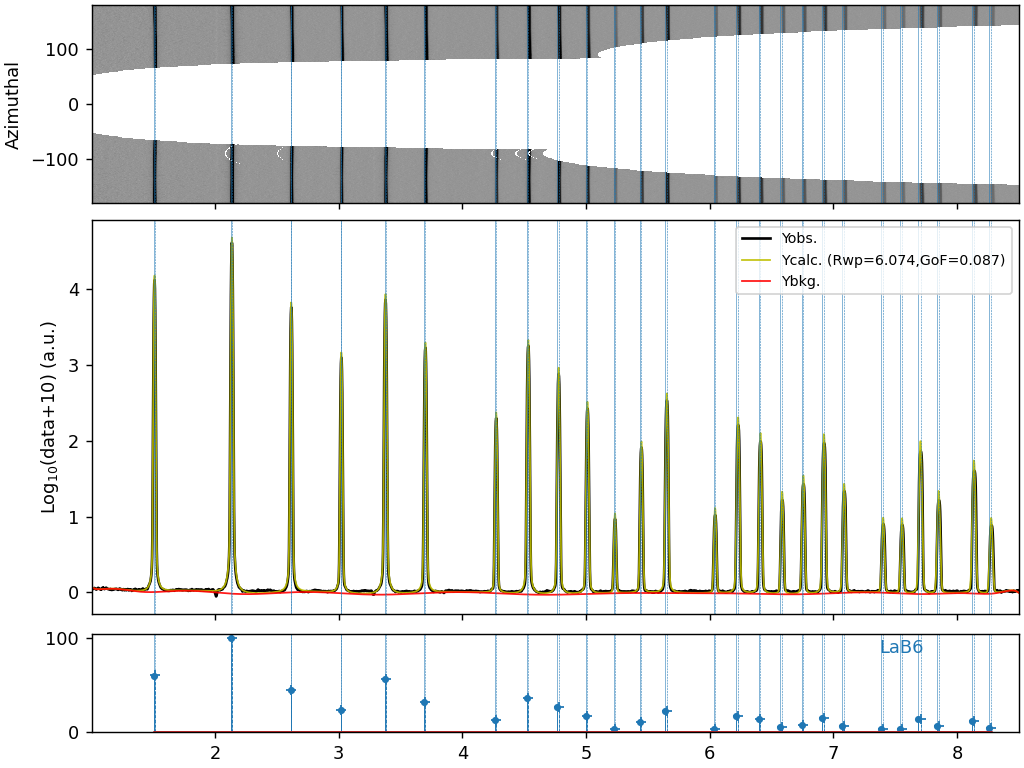

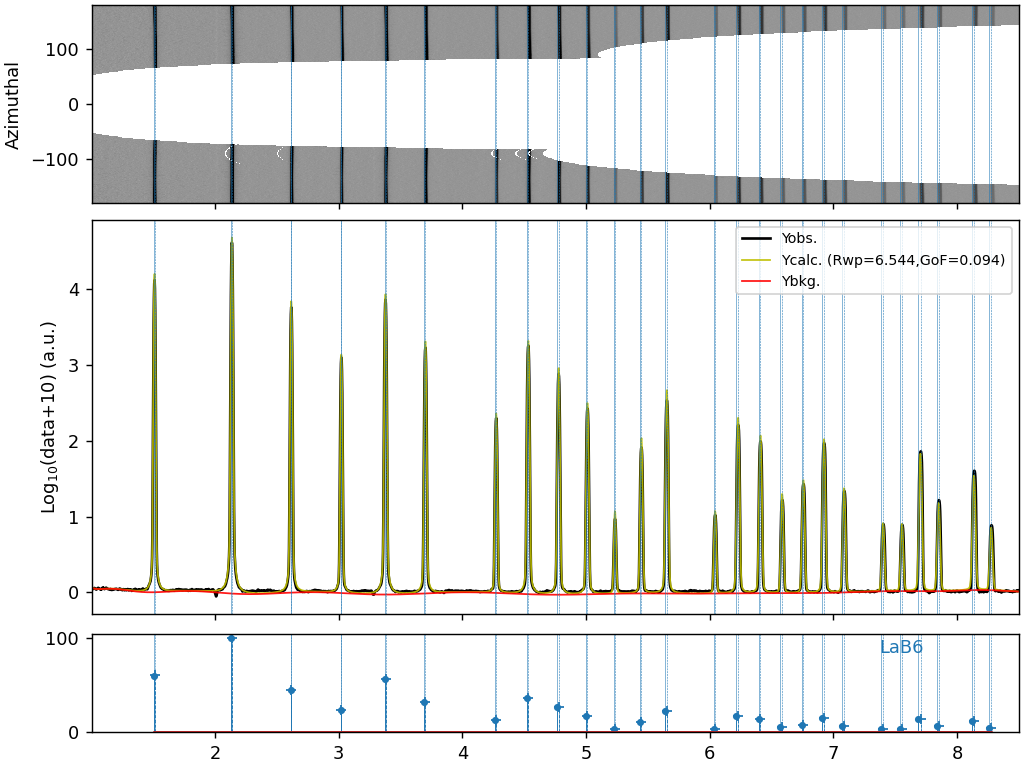

In [10]:
sample = deepcopy(sample_LaB6)


sample.get_baseline(input_bkg=sample_Kapton.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=True,
                    roi_radial_range=[1.0,8.5],
                    normalize_to = 100,
                    spotty_data_correction=False,
                    spotty_data_correction_threshold=2,
                    plot=True)
sample.load_phases(phases=phases_LaB6,plot=False)

sample.setup_gsas2_calculator(instprm_from_gpx='gsas_instprms.gpx')
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.plot_refinement()

sample.set_LeBail(set_to=False,refine=True)
sample.refine_phase_fractions()
sample.refine_preferred_orientation(phase=0,harmonics_order=4)
sample.refine_background(num_coeffs=20)
sample.plot_refinement(ylogscale=True)

/home/mt/software/miniforge3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mt/software/miniforge3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



Rwp from 1st refinement is = 47.052 
 
Cell parameters of all phases are refined. Rwp is now 7.882 (was 47.052)
Strain broadening of all phases are refined. Rwp is now 6.019 (was 7.882)
Size broadening of all phases are refined. Rwp is now 6.016 (was 6.019)
Background is refined. Rwp is now 5.942 (was 6.016)
After setting LeBail refinement to False, Rwp is now 7.265 (was 5.942)
Phase fractions of all phases are refined. Rwp is now 7.265 (was 7.265)
Preferred orientation for CeO2 phase is refined. Rwp is now 7.260 (was 7.265)
Background is refined. Rwp is now 7.110 (was 7.260)


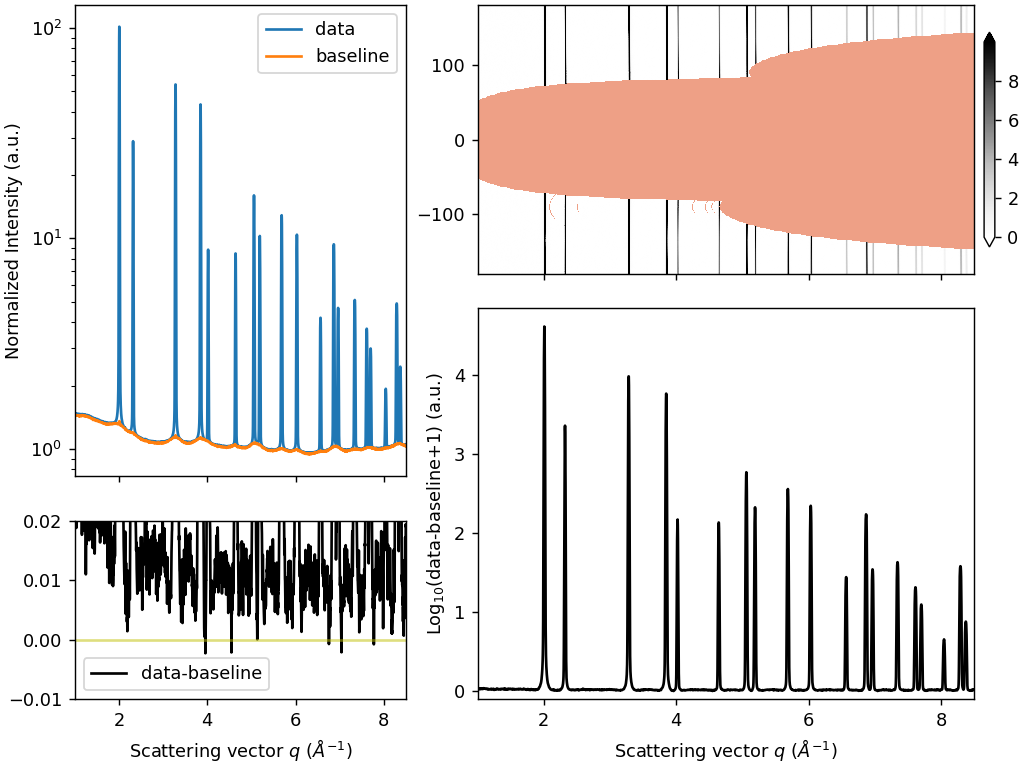

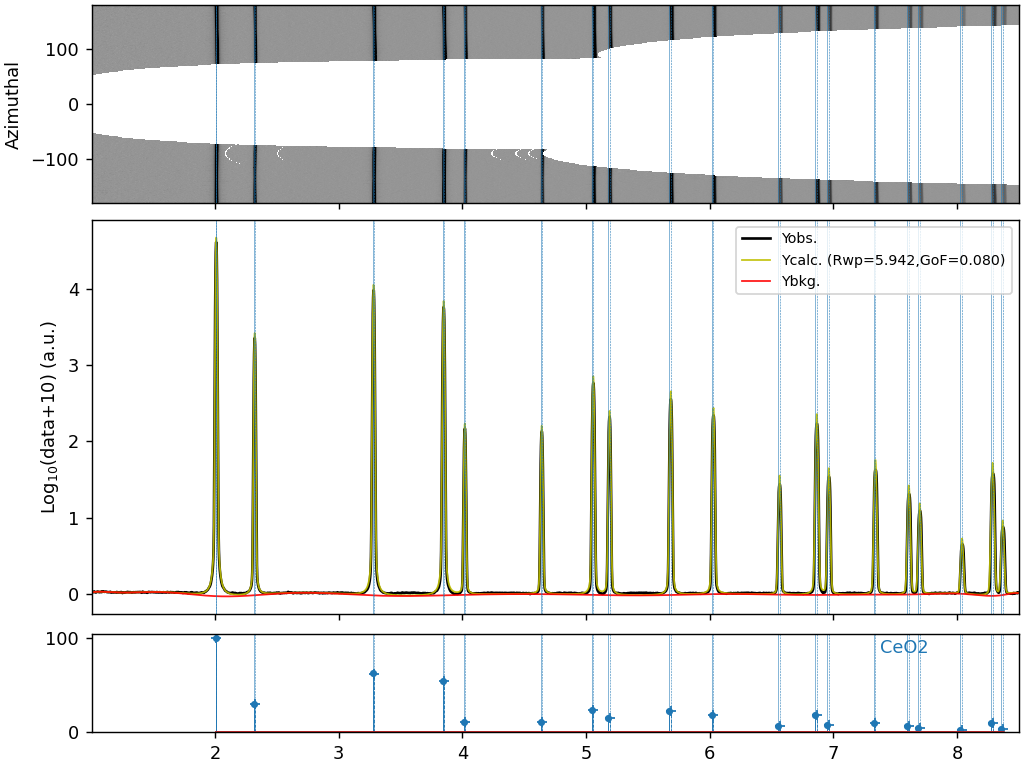

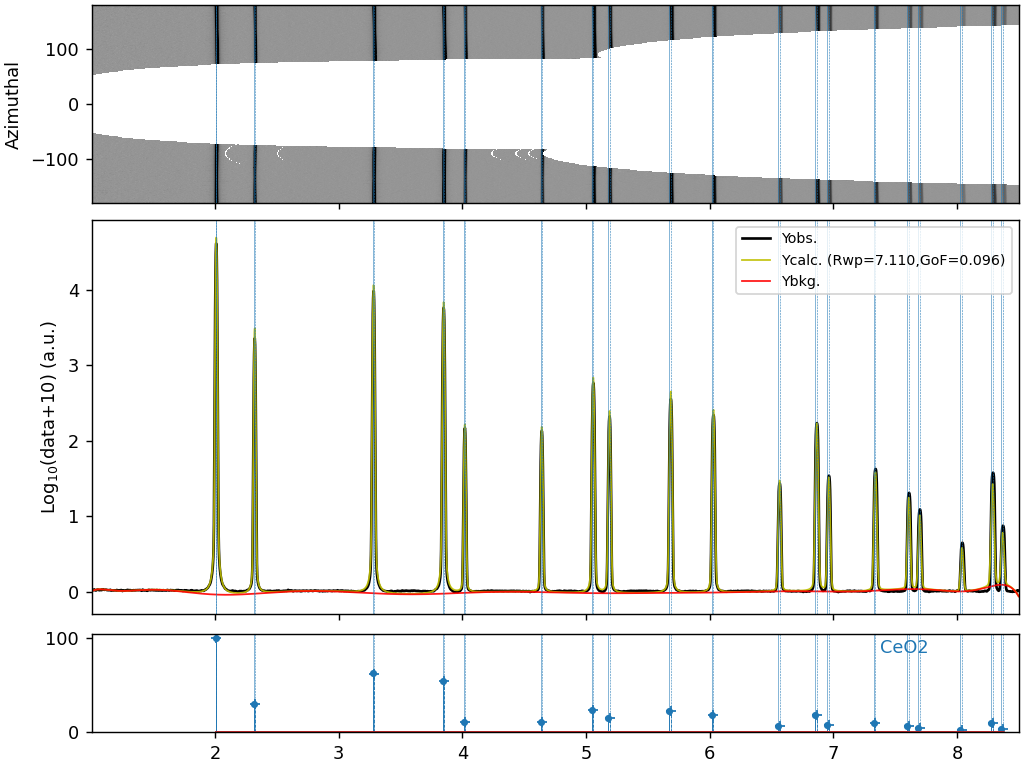

In [12]:
sample = deepcopy(sample_CeO2)


sample.get_baseline(input_bkg=sample_Kapton.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=True,
                    roi_radial_range=[1.0,8.5],
                    normalize_to = 100,
                    spotty_data_correction=False,
                    spotty_data_correction_threshold=2,
                    plot=True)
sample.load_phases(phases=phases_CeO2,plot=False)

sample.setup_gsas2_calculator(instprm_from_gpx='gsas_instprms.gpx')
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.plot_refinement()

sample.set_LeBail(set_to=False,refine=True)
sample.refine_phase_fractions()
sample.refine_preferred_orientation(phase=0,harmonics_order=4)
sample.refine_background(num_coeffs=20)
sample.plot_refinement(ylogscale=True)

/home/mt/software/miniforge3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mt/software/miniforge3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/mt/software/miniforge3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mt/software/miniforge3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



Rwp from 1st refinement is = 52.718 
 
Cell parameters of all phases are refined. Rwp is now 5.348 (was 52.718)
Strain broadening of all phases are refined. Rwp is now 5.255 (was 5.348)
Size broadening of all phases are refined. Rwp is now 5.319 (was 5.255)
Background is refined. Rwp is now 4.999 (was 5.319)
After setting LeBail refinement to False, Rwp is now 9.755 (was 4.999)
Phase fractions of all phases are refined. Rwp is now 6.339 (was 9.755)
Preferred orientation for LaB6 phase is refined. Rwp is now 6.324 (was 6.339)
Background is refined. Rwp is now 6.223 (was 6.324)


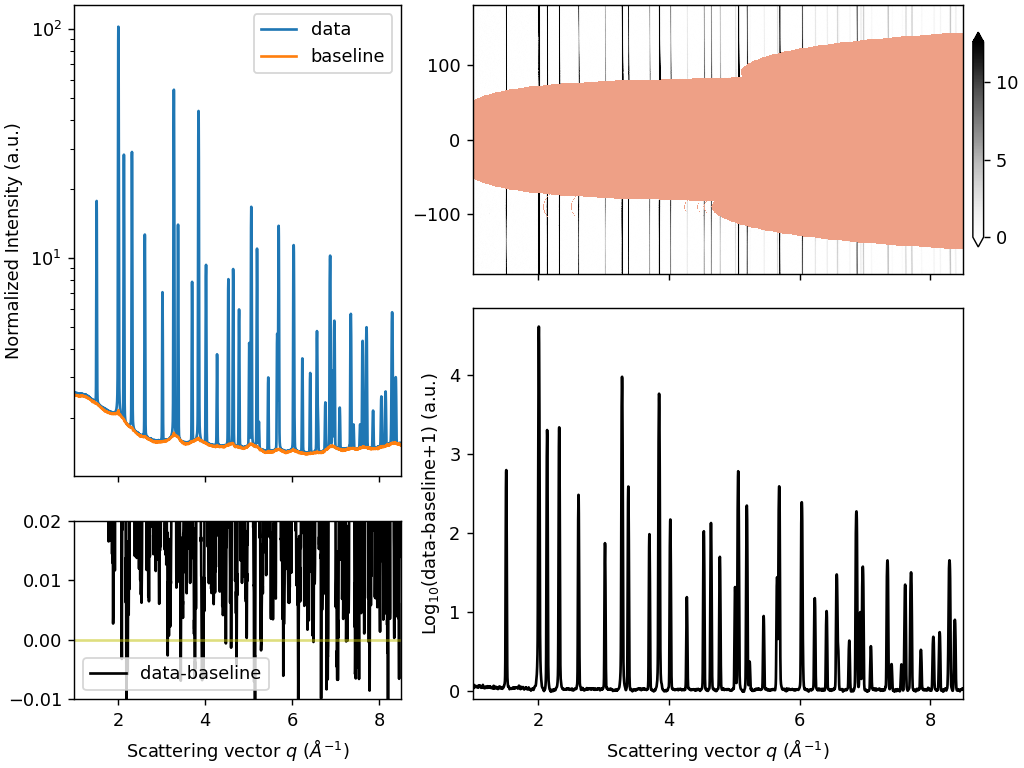

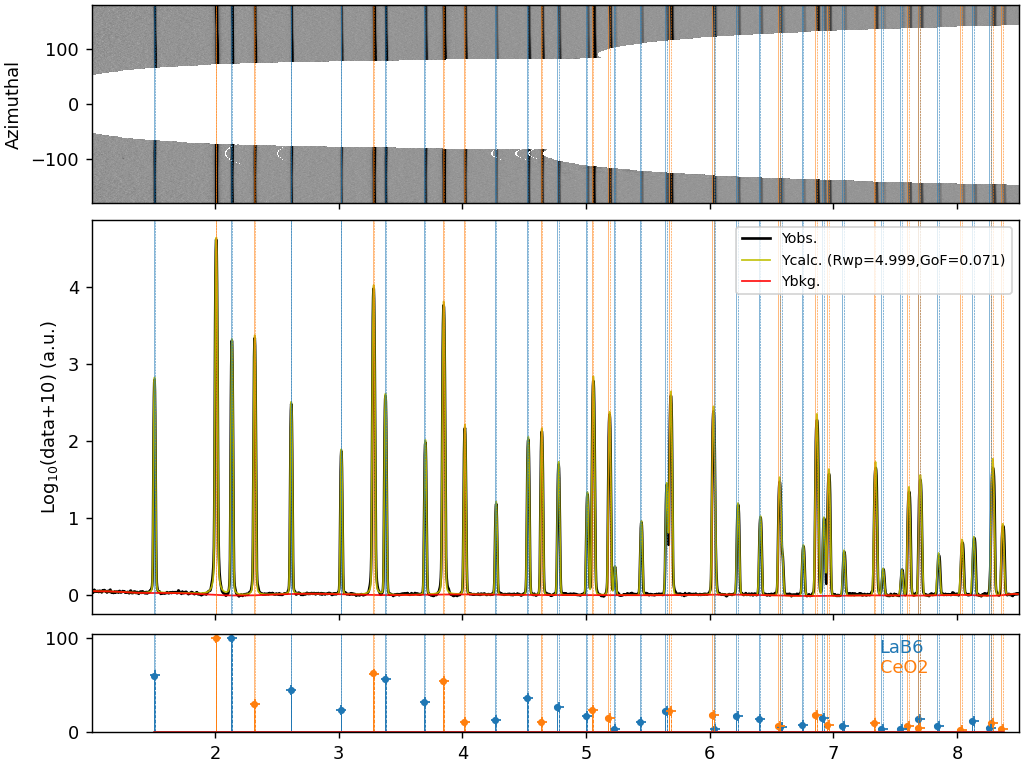

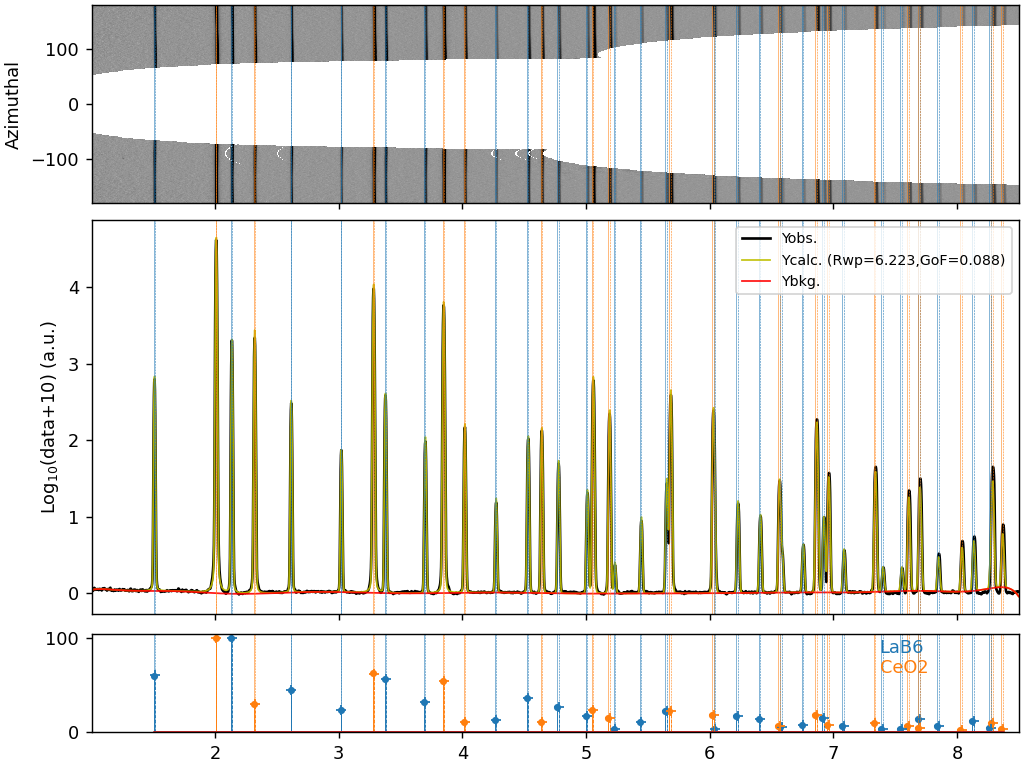

In [13]:
sample = deepcopy(sample_mix)


sample.get_baseline(input_bkg=sample_Kapton.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=True,
                    roi_radial_range=[1.0,8.5],
                    normalize_to = 100,
                    spotty_data_correction=False,
                    spotty_data_correction_threshold=2,
                    plot=True)
sample.load_phases(phases=phases_mix,plot=False)

sample.setup_gsas2_calculator(instprm_from_gpx='gsas_instprms.gpx')
sample.refine_cell_params()
sample.refine_strain_broadening()
sample.refine_size_broadening()
sample.refine_background(num_coeffs=20)
sample.plot_refinement()

sample.set_LeBail(set_to=False,refine=True)
sample.refine_phase_fractions()
sample.refine_preferred_orientation(phase=0,harmonics_order=4)
sample.refine_background(num_coeffs=20)
sample.plot_refinement(ylogscale=True)